In [1]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
import numpy as np

In [21]:
pixelfile = search_targetpixelfile("Kepler-10", quarter= 10).download(quality_bitmask = 'hardest')

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


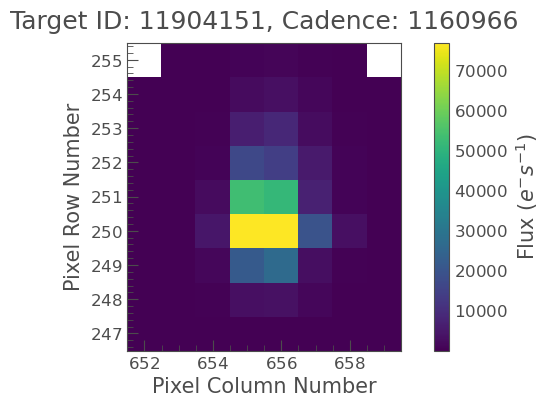

In [22]:
ax = pixelfile.plot(frame=1000)     # this returns a matplotlib Axes
plt.show() 

In [23]:
lc = pixelfile.to_lightcurve(aperture_mask = 'all')

In [24]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[906.83573177 906.83641298 906.83777531 ... 936.95324762 936.95392872
  936.95460973]>,
 <Quantity [559802.6 , 559804.9 , 559640.06, ..., 559687.94, 559499.2 ,
            559559.4 ] electron / s>)

In [25]:
lc.plot()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [26]:
pxlfile = search_targetpixelfile('Kepler-10', quarter= 4).download()

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [27]:
lc = pxlfile.to_lightcurve(aperture_mask = pxlfile.pipeline_mask)

In [28]:
lc.plot

<bound method LightCurve.plot of <KeplerLightCurve length=30563 LABEL="KIC 11904151" QUARTER=4 CAMPAIGN=None>
       time            flux          flux_err      ... cadenceno quality
                   electron / s    electron / s    ...                  
       Time          float32         float32       ...   int32    int32 
------------------ ------------ ------------------ ... --------- -------
 352.3672291343828    562934.75 113.04576873779297 ...    345880       0
 352.3679101202433  562906.0625 113.04017639160156 ...    345881       0
 352.3685913060981    562948.75 113.04794311523438 ...    345882       0
 352.3692723919521   562872.375  112.9912338256836 ...    345883       0
 352.3699534778061  563033.9375 113.04522705078125 ...    345884       0
 352.3706345637256  563080.9375 113.04826354980469 ...    345885       0
 352.3713157495804  562947.0625 113.04512786865234 ...    345886       0
 352.3719968354344   562897.875 113.03520965576172 ...    345887       0
 352.372677921

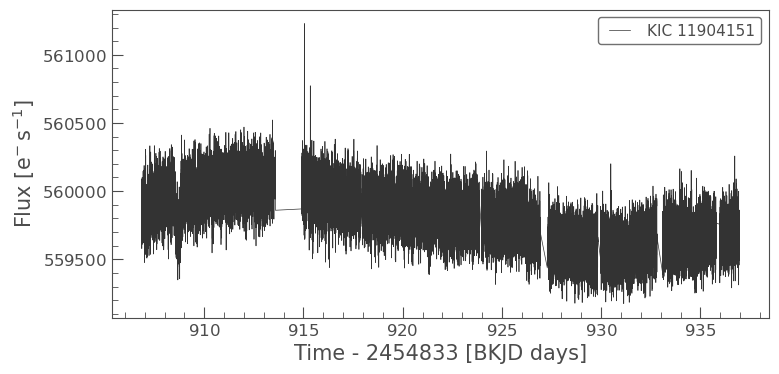

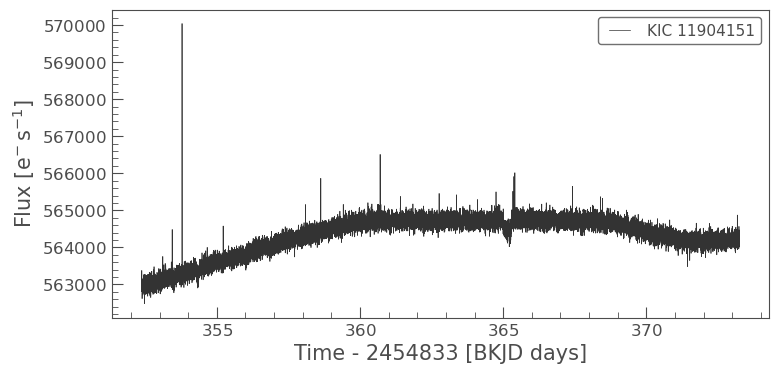

In [29]:
lc.plot()
plt.show()

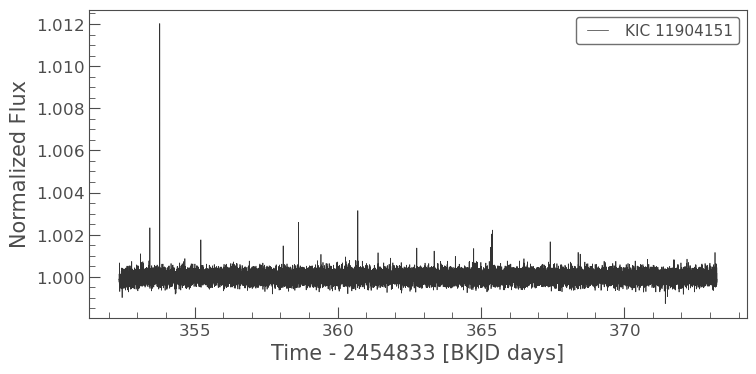

In [33]:
flat_lc = lc.flatten(window_length= 401)
flat_lc.plot()
plt.show()

In [34]:
folded_lc = flat_lc.fold(period = 3.5225)

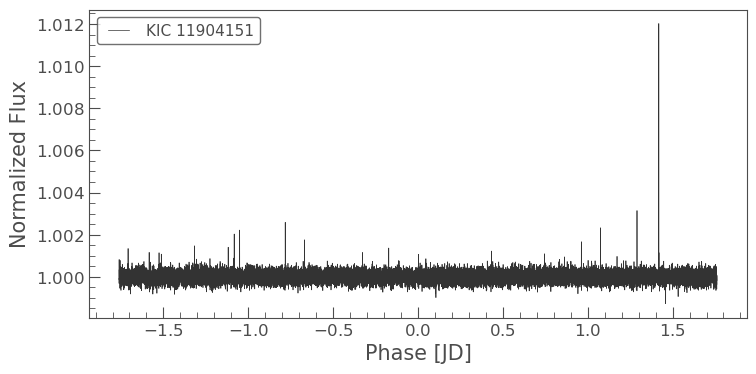

In [35]:
folded_lc.plot()
plt.show()

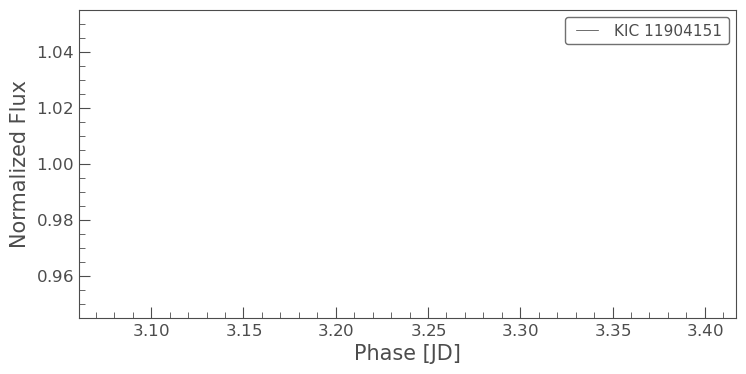

In [36]:
binned_lc = folded_lc.bin(time_bin_size=10)
binned_lc.plot()
plt.show()

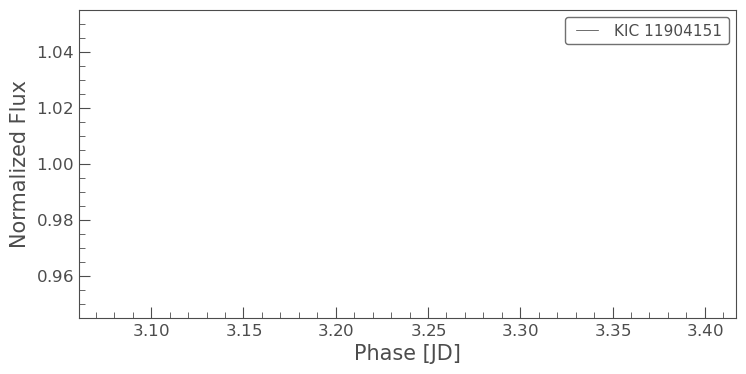

In [37]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(time_bin_size=10).plot()
plt.show()

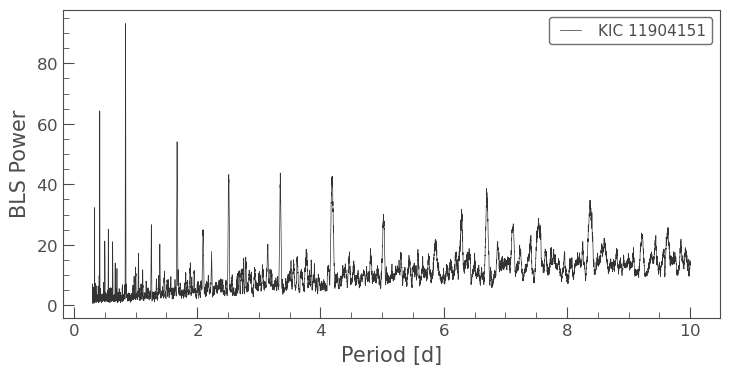

In [17]:
duration = 0.1
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.3, 10, 0.001), duration = 0.1)
periodogram.plot()
plt.show()

In [18]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 0.83800 d


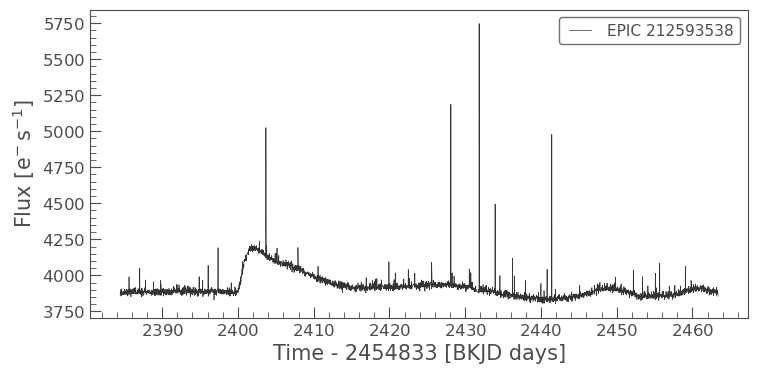

In [19]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot()
plt.show()

In [20]:
import lightkurve as lk

In [24]:
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [25]:
tpf.mission
tpf.targetid 

261136679

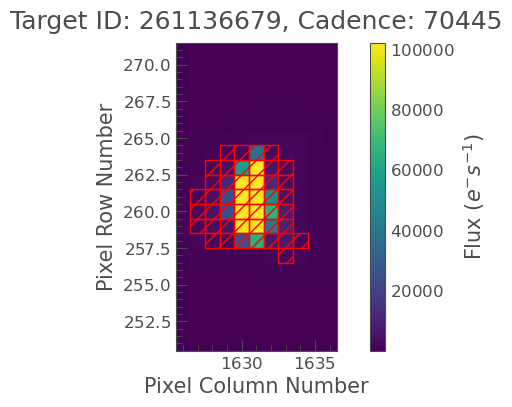

In [26]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

In [27]:
lc = tpf.to_lightcurve()
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [28]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [29]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [30]:
clipped_lc = flat_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.1)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

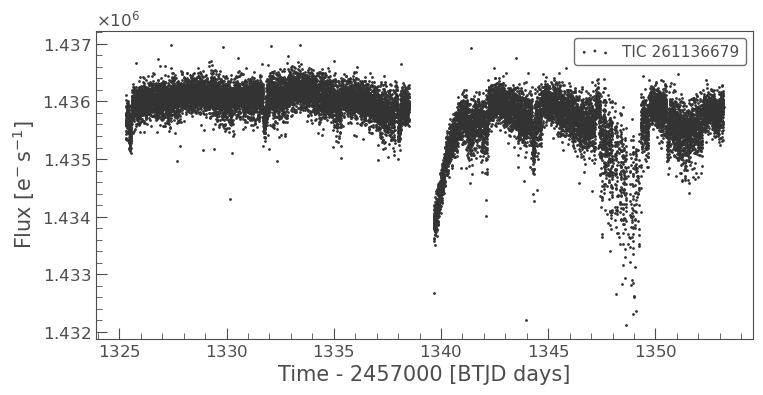

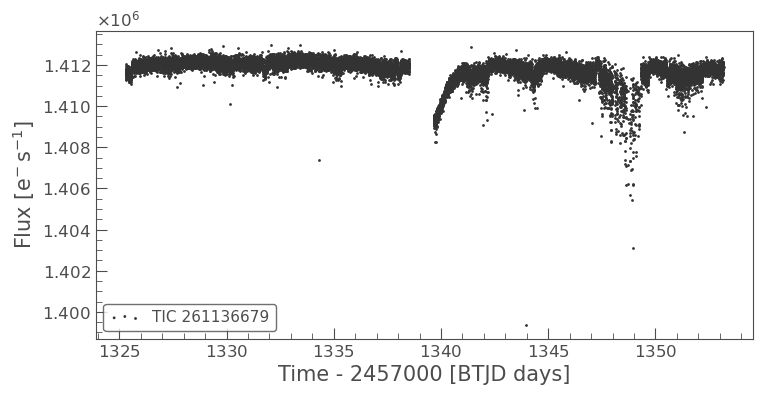

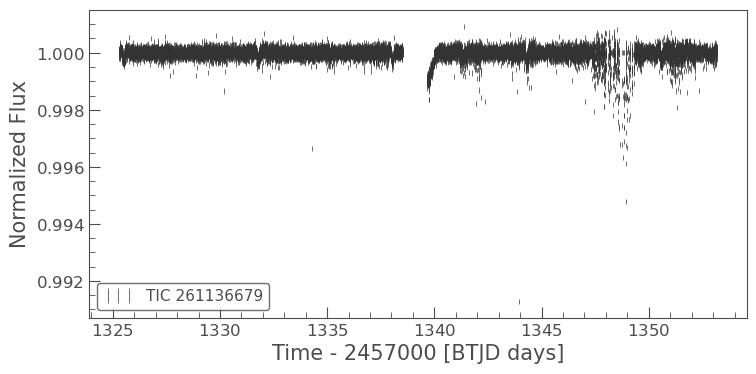

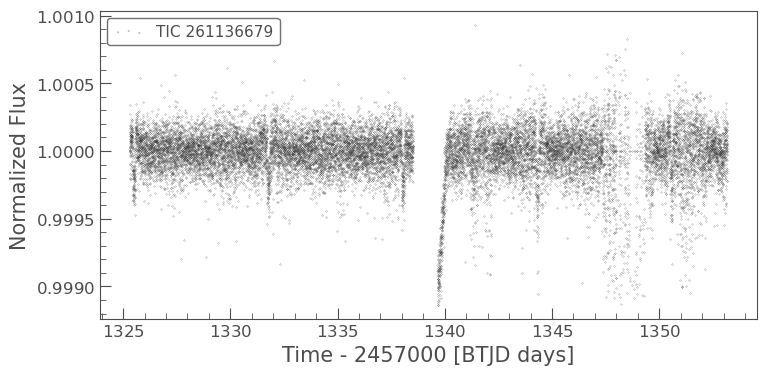

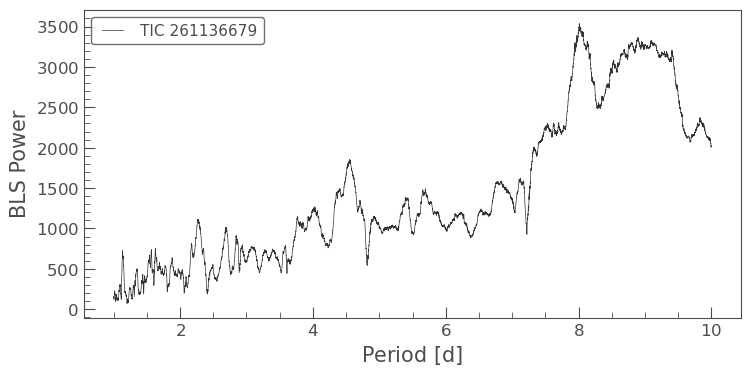

In [31]:
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [32]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 8.010 d


In [33]:
folded_lc = clipped_lc.fold(period=6.300, epoch_time=1325.504)
folded_lc.scatter(s=0.1)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

In [34]:
binned_lc = folded_lc.bin(time_bin_size=10) 
binned_lc.scatter()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

c:\Users\ishitv\anaconda3\envs\lk\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


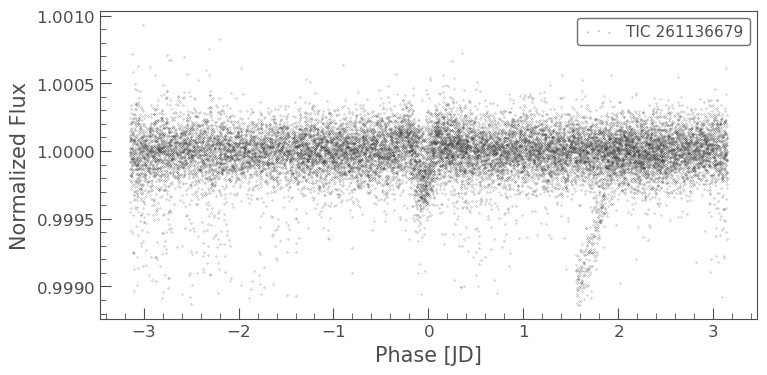

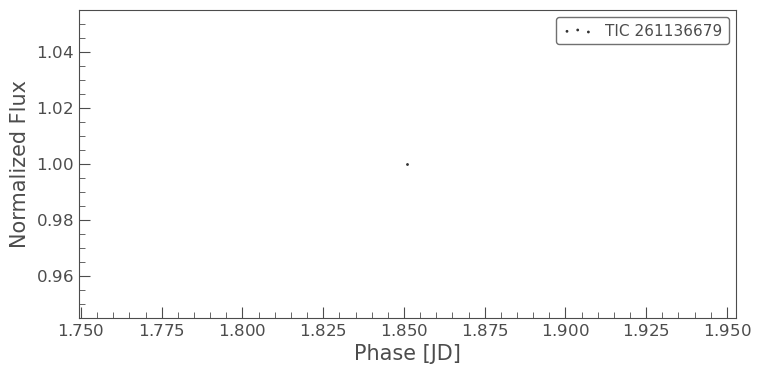

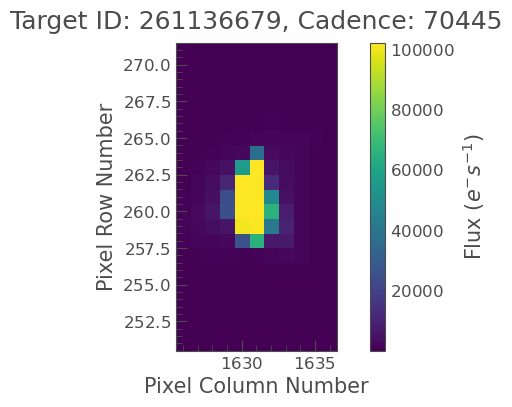

In [35]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')
tpf.plot()
plt.show()

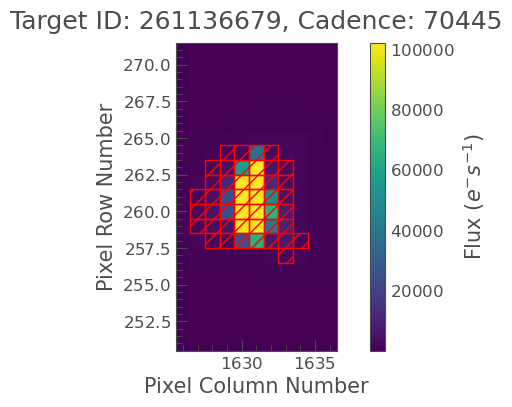

In [36]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

In [37]:
lc = tpf.to_lightcurve()
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [38]:
flat_lc = lc.flatten()
flat_lc.scatter(s=1)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

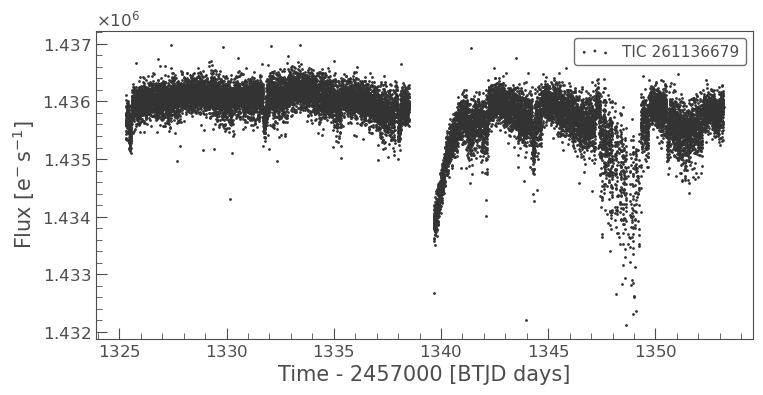

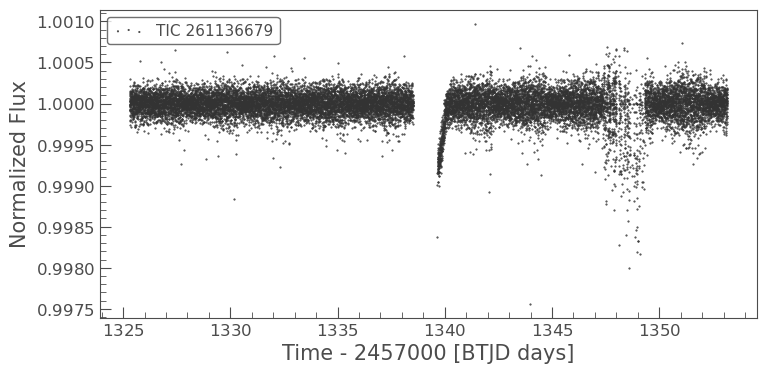

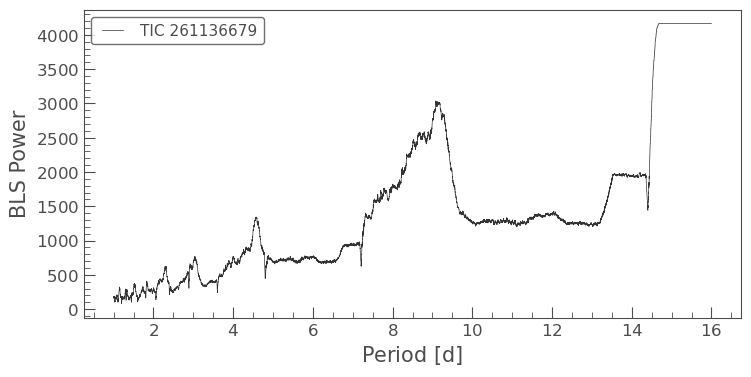

In [39]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(1, 16, 0.001))
periodogram.plot()
plt.show()

In [40]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 15.968 d


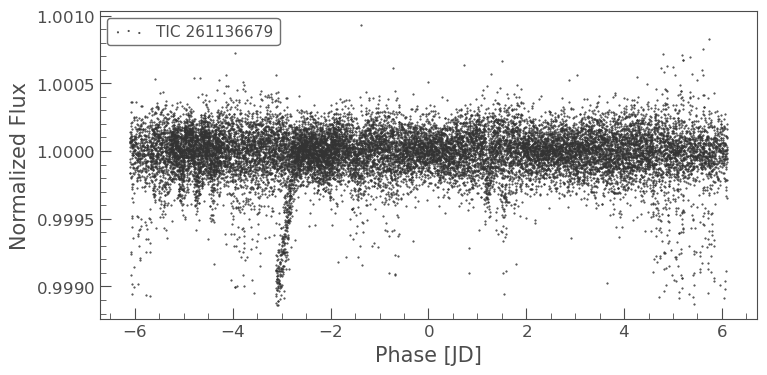

In [41]:
folded_lc = clipped_lc.fold(period=12.223, epoch_time=1355)
folded_lc.scatter(s=1)
plt.show()

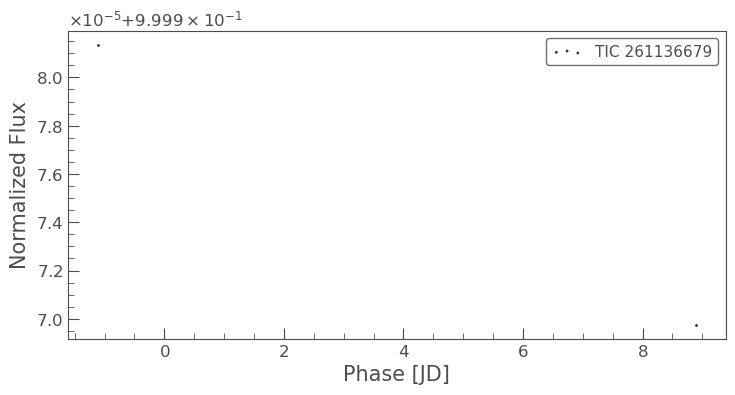

In [42]:
binned_lc = folded_lc.bin(time_bin_size=10) 
binned_lc.scatter()
plt.show()